# SUJET1: INTERROGER DE GROS VOLUMES DE DONNEES AVEC DES MOTEURS SQL ET ENSUITE LES MANIPULER

## OBSERVATION DE NOS DATASETS VIA DES DATAFRAMES

In [5]:
import chdb 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### DATAFRAME items_receipts

In [6]:
# Appel rapide sur la base de donnée par cette requête query1
query1 = f"""
SELECT *
FROM file('items_receipts.csv', 'CSVWithNames')
LIMIT 1000000
"""

# Création du dataframe "data_items_receipts" à partir de la requête "query1" chdb
data_items_receipts = chdb.query(query1, output_format='DataFrame')
data_items_receipts.head()

,id,receiptId,itemId,createdAt,updatedAt,selection,quantity,unit
0,9b71abf8-5a5b-4435-965b-db527a90895d,4cf842bc-28ee-420b-9d7c-be3f57046099,85e051d2-becd-48c0-83ee-7b85a8299c65,2025-01-08 18:58:31.532807+01:00,2025-01-08 18:58:31.532807+01:00,[],1.0,
1,ae81fa91-faab-4299-965b-dbd48af95a84,f7e841a5-0e92-4291-ab7e-d17fa38ed17b,f8ad7315-aaea-4dd8-ab10-5e7bd6775844,2025-01-08 09:40:55.317306+01:00,2025-01-08 09:40:55.317306+01:00,[],1.0,
2,0d0a0245-442b-40be-965b-dc313d64ecfc,277ab13e-d7fb-4949-b15e-a3912954583e,f01da06e-0ded-4e3a-be19-d9d1d448e2d2,2025-01-08 20:28:29.350306+01:00,2025-01-08 20:28:29.350306+01:00,[],1.0,
3,ec61fdd9-835c-4fe9-965b-dc388d2ac924,7aba0a49-4f06-4659-baa5-2995c7db8de0,241312f8-0471-4f51-9601-5f24a8434474,2025-01-08 16:34:38.738122+01:00,2025-01-08 16:34:38.738122+01:00,[],1.0,
4,77977ac9-0487-4c0d-965b-dca4699528c2,4e748183-cbe8-4b14-aa52-baaed9129fe3,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,2025-01-09 06:15:23.808027+01:00,2025-01-09 06:15:23.808027+01:00,[],2.0,


In [8]:
# Vérification des doublons seulement à la colonne des 'id'
data_items_receipts['id'].duplicated().sum()

np.int64(0)

#### DATAFRAME rcp

In [13]:
# Appel rapide sur la base de donnée par cette requête query2
query2 = f"""
SELECT *
FROM file('rcpt2.csv', 'CSVWithNames')
LIMIT 1000000
"""

# Création du dataframe "data_rcp" à partir de la requête "query2" chdb
data_rcp = chdb.query(query2, output_format='DataFrame')
data_rcp.head()

,id,amount,date,storeId
0,06d96bb2-7b4d-4f00-8003-373b7a6d2ce5,20.0,1736003905000,bac373f8-5103-4970-bbf8-b100770b4eaf
1,747f7768-5932-46e0-93af-4023e86942e5,34.6,1735832361000,7fb46c64-9bcc-4aec-b18a-ed4d26ea1ac7
2,ad0ee8fc-e190-4d93-93af-4061050c0c26,11.6,1735894715000,48fe6c9e-7f3c-404c-84d2-56bbb319427e
3,b43b7e76-a649-4681-93af-4064538ea508,100.5,1735813079000,120f9ff8-8b5c-4fac-9cea-4e51c3ec690a
4,5dcea717-1771-4df8-93af-408b3a39727d,100.5,1735745250000,7b893a24-3dc3-45cb-aa72-b290dbf42511


In [14]:
# Vérification des doublons seulement à la colonne des 'id'
data_rcp['id'].duplicated().sum()

np.int64(0)

#### DATAFRAME stores

In [11]:
# Appel rapide sur la base de donnée par cette requête query3
query3 = f"""
SELECT *
FROM file('stores.csv', 'CSVWithNames')
LIMIT 1000000
"""

# Création du dataframe "data_stores" à partir de la requête "query3" chdb
data_stores = chdb.query(query3, output_format='DataFrame')
data_stores.head()

,id,name,postalCode
0,85dcc8a2-0e5b-472c-8000-c167882c634e,EXCEL 'FOOD,93200.0
1,0a3791eb-2949-4b65-8001-46da3db64098,iStrada Bar,69230.0
2,f96cf836-d5eb-4626-8001-c7e2522de056,SAS l'ECRIN A BIJOU,42300.0
3,2830c3be-197e-4fb5-8005-c4f53a3f5862,Pêle-Mêle,NaN
4,5869b823-74af-4862-8009-6dfb1bdfc92f,LES GOURMANDISES DU DON,44520.0


In [12]:
#Vérification des doublons seulement à la colonne des 'id'
data_stores['id'].duplicated().sum()

np.int64(0)

#### DATAFRAME items

In [15]:
# Appel rapide sur la base de donnée par cette requête query4
query4 = f"""
SELECT *
FROM file('items.csv', 'CSVWithNames')
LIMIT 1000000
"""
# Création du dataframe "data_items" à partir de la requête "query4" chdb
data_items = chdb.query(query4, output_format='DataFrame')
data_items.head()

,id,itemName,amount,storeId
0,af23cd34-9e39-42b1-8400-d3f6018d5bfa,pas bcp de sauce tomate,0.00,676ce71a-8cb4-4732-b46c-f31f785d18bf
1,059881df-90ad-47d7-8400-d42408b4294a,remb. tirage et sport,-3.00,de61d600-48fc-4892-887e-3715df56db6e
2,2d3d88d2-86ec-47e3-8400-d5e2f6c3f7f4,produit presse,11.99,f9976244-d2e7-42c0-879b-fa0b6bbde02c
3,ad51964b-0d0b-482a-8400-d67b73fb2677,remboursement jeux,-36.00,95f3c0ab-703b-4e36-81d2-2bc88b727529
4,18b7db0f-b7ef-435e-8400-d802b12d6959,remb. jeux,-109.00,695aad57-e2ec-4cec-88c4-bc65c919e22b


In [16]:
# Vérification des doublons seulement à la colonne des 'id'
data_items['id'].duplicated().sum()

np.int64(0)

#### <font color="red">NB:<font color="black"> Nous avons vérifié les doublons seulement à la colonne 'id' parce que le 'id' est une valeur unique, si d'autres variables changent et que le 'id' est unique il y a bel et bien une raison et rien ne sera à changer sur ces autres variables sans raison.

## CONNAITRE LES BOISSONS LES PLUS CONSOMMEE EN FRANCE ET LES TERRITOIRES OU CES BOISSONS SONT LE PLUS CONSOMMEES

### <font color="green"> I. IDENTIFICATION DE LA TABLE PIVOT

#### Notre analyse devrait reposer sur les informations liées à la consomamation de boissons sur le territoire français. Donc <font color="red"> 3 informations <font color="black">essentielles sont: <font color="red">consommation, boissons, territoire français.
#### Seule <font color="red">LA TABLE items_receipts <font color="black"> contient au moins 2 de ces 3 informations. Ce sont: <font color="red">'itemId'<font color="black"> qui correspond à <font color="red"> boissons <font color="black"> et <font color="red"> 'quantity' <font color="black"> qui correspond à <font color="red"> consommation.

#### LA TABLE PIVOT EST: <font color="red">items_receipts

### <font color="green"> II. LES DIFFERENTES JOINTURES

##### <font color="green"> JOINTURES DE GAUCHE DE LA TABLE items_receipts AVEC LA TABLE items

##### Clé étrangère:<font color="red"> 'itemId' 
##### Clé primaire:<font color="red"> 'id'

In [19]:
# Jointure avec items, pour avoir itemName et amount dans la base
data_main= data_items_receipts.merge(data_items, left_on="itemId", right_on="id", how="left", suffixes=('', '_item'))

# Affichage des 5 premières lignes du Dataframe data_main
data_main.head()

,id,receiptId,itemId,createdAt,updatedAt,selection,quantity,unit,id_item,itemName,amount,storeId
0,9b71abf8-5a5b-4435-965b-db527a90895d,4cf842bc-28ee-420b-9d7c-be3f57046099,85e051d2-becd-48c0-83ee-7b85a8299c65,2025-01-08 18:58:31.532807+01:00,2025-01-08 18:58:31.532807+01:00,[],1.0,,NaN,NaN,NaN,NaN
1,ae81fa91-faab-4299-965b-dbd48af95a84,f7e841a5-0e92-4291-ab7e-d17fa38ed17b,f8ad7315-aaea-4dd8-ab10-5e7bd6775844,2025-01-08 09:40:55.317306+01:00,2025-01-08 09:40:55.317306+01:00,[],1.0,,NaN,NaN,NaN,NaN
2,0d0a0245-442b-40be-965b-dc313d64ecfc,277ab13e-d7fb-4949-b15e-a3912954583e,f01da06e-0ded-4e3a-be19-d9d1d448e2d2,2025-01-08 20:28:29.350306+01:00,2025-01-08 20:28:29.350306+01:00,[],1.0,,NaN,NaN,NaN,NaN
3,ec61fdd9-835c-4fe9-965b-dc388d2ac924,7aba0a49-4f06-4659-baa5-2995c7db8de0,241312f8-0471-4f51-9601-5f24a8434474,2025-01-08 16:34:38.738122+01:00,2025-01-08 16:34:38.738122+01:00,[],1.0,,NaN,NaN,NaN,NaN
4,77977ac9-0487-4c0d-965b-dca4699528c2,4e748183-cbe8-4b14-aa52-baaed9129fe3,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,2025-01-09 06:15:23.808027+01:00,2025-01-09 06:15:23.808027+01:00,[],2.0,,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,jeux 10e,10.0,a021811c-56f0-489f-a32a-98b18039a57e


##### <font color="green"> JOINTURES DE GAUCHE DE LA TABLE data_main AVEC LA TABLE rcp

##### Clé étrangère:<font color="red"> 'receiptId' 
##### Clé primaire:<font color="red"> 'id'

In [20]:
# Jointure avec rcp pour avoir date et storeId dans la base
data_main = data_main.merge(data_rcp, left_on="receiptId", right_on="id", how="left", suffixes=('', '_rcp'))

# Affichage des 5 premières lignes du Dataframe data_main
data_main.head()

,id,receiptId,itemId,createdAt,updatedAt,selection,quantity,unit,id_item,itemName,amount,storeId,id_rcp,amount_rcp,date,storeId_rcp
0,9b71abf8-5a5b-4435-965b-db527a90895d,4cf842bc-28ee-420b-9d7c-be3f57046099,85e051d2-becd-48c0-83ee-7b85a8299c65,2025-01-08 18:58:31.532807+01:00,2025-01-08 18:58:31.532807+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae81fa91-faab-4299-965b-dbd48af95a84,f7e841a5-0e92-4291-ab7e-d17fa38ed17b,f8ad7315-aaea-4dd8-ab10-5e7bd6775844,2025-01-08 09:40:55.317306+01:00,2025-01-08 09:40:55.317306+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d0a0245-442b-40be-965b-dc313d64ecfc,277ab13e-d7fb-4949-b15e-a3912954583e,f01da06e-0ded-4e3a-be19-d9d1d448e2d2,2025-01-08 20:28:29.350306+01:00,2025-01-08 20:28:29.350306+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ec61fdd9-835c-4fe9-965b-dc388d2ac924,7aba0a49-4f06-4659-baa5-2995c7db8de0,241312f8-0471-4f51-9601-5f24a8434474,2025-01-08 16:34:38.738122+01:00,2025-01-08 16:34:38.738122+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77977ac9-0487-4c0d-965b-dca4699528c2,4e748183-cbe8-4b14-aa52-baaed9129fe3,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,2025-01-09 06:15:23.808027+01:00,2025-01-09 06:15:23.808027+01:00,[],2.0,,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,jeux 10e,10.0,a021811c-56f0-489f-a32a-98b18039a57e,4e748183-cbe8-4b14-aa52-baaed9129fe3,-13.6,1.736164e+12,a021811c-56f0-489f-a32a-98b18039a57e


##### <font color="green"> JOINTURES DE GAUCHE DE LA TABLE data_main AVEC LA TABLE stores

##### Clé étrangère:<font color="red"> 'storeId' 
##### Clé primaire:<font color="red"> 'id'

In [21]:
# Jointure avec stores pour avoir postalCode dans la base
data_main = data_main.merge(data_stores, left_on="storeId", right_on="id", how="left", suffixes=('', '_store'))

# Affichage des 5 premières lignes du Dataframe data_main
data_main.head()

,id,receiptId,itemId,createdAt,updatedAt,selection,quantity,unit,id_item,itemName,amount,storeId,id_rcp,amount_rcp,date,storeId_rcp,id_store,name,postalCode
0,9b71abf8-5a5b-4435-965b-db527a90895d,4cf842bc-28ee-420b-9d7c-be3f57046099,85e051d2-becd-48c0-83ee-7b85a8299c65,2025-01-08 18:58:31.532807+01:00,2025-01-08 18:58:31.532807+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
1,ae81fa91-faab-4299-965b-dbd48af95a84,f7e841a5-0e92-4291-ab7e-d17fa38ed17b,f8ad7315-aaea-4dd8-ab10-5e7bd6775844,2025-01-08 09:40:55.317306+01:00,2025-01-08 09:40:55.317306+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
2,0d0a0245-442b-40be-965b-dc313d64ecfc,277ab13e-d7fb-4949-b15e-a3912954583e,f01da06e-0ded-4e3a-be19-d9d1d448e2d2,2025-01-08 20:28:29.350306+01:00,2025-01-08 20:28:29.350306+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
3,ec61fdd9-835c-4fe9-965b-dc388d2ac924,7aba0a49-4f06-4659-baa5-2995c7db8de0,241312f8-0471-4f51-9601-5f24a8434474,2025-01-08 16:34:38.738122+01:00,2025-01-08 16:34:38.738122+01:00,[],1.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN
4,77977ac9-0487-4c0d-965b-dca4699528c2,4e748183-cbe8-4b14-aa52-baaed9129fe3,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,2025-01-09 06:15:23.808027+01:00,2025-01-09 06:15:23.808027+01:00,[],2.0,,056dcdac-9bd7-497d-b8cf-248f96a2ec8a,jeux 10e,10.0,a021811c-56f0-489f-a32a-98b18039a57e,4e748183-cbe8-4b14-aa52-baaed9129fe3,-13.6,1.736164e+12,a021811c-56f0-489f-a32a-98b18039a57e,a021811c-56f0-489f-a32a-98b18039a57e,Bar le Corneille,76650.0


In [22]:
# Vérification des doublons seulement à la colonne des 'id'
data_main['id'].duplicated().sum()

np.int64(0)

### <font color="green"> III. TRANSFORMATION ET NETTOYAGE DE "data_main"

##### <font color="green"> CONVERTIR LA COLONNE 'date'

La colonne 'date' étant en timestamp UNIX et pas compréhensible, on la convertit pour qu'elle soit lisible dans un format normal.

In [23]:
# Conversion de la date
data_main["date"] = pd.to_datetime(data_main["date"], unit="ms")

##### <font color="green"> SELECTION DES COLONNES UTILES POUR NOTRE ANALYSE

In [24]:
# Sélection des colonnes
data_main = data_main[[
    "receiptId", "date", "itemName", "quantity", "amount","postalCode", "storeId"
]].rename(columns={
    "amount": "unit_price"
})

# Afficher les 5 premières lignes de 'data_main'
data_main.head()

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId
0,4cf842bc-28ee-420b-9d7c-be3f57046099,NaT,NaN,1.0,NaN,NaN,NaN
1,f7e841a5-0e92-4291-ab7e-d17fa38ed17b,NaT,NaN,1.0,NaN,NaN,NaN
2,277ab13e-d7fb-4949-b15e-a3912954583e,NaT,NaN,1.0,NaN,NaN,NaN
3,7aba0a49-4f06-4659-baa5-2995c7db8de0,NaT,NaN,1.0,NaN,NaN,NaN
4,4e748183-cbe8-4b14-aa52-baaed9129fe3,2025-01-06 11:46:13,jeux 10e,2.0,10.0,76650.0,a021811c-56f0-489f-a32a-98b18039a57e


#### NB: On remarque que la colonne <font color="red"> 'quantity'<font color="black"> et <font color="red">'postalCode'<font color="black"> qui doivent être des entiers, sont en décimaux. On vérifie leurs types, si ils sont en décimaux, on les corrige et on les met en entier.

In [11]:
# Vérification du type des colonnes 
data_main.dtypes

receiptId             object
date          datetime64[ns]
itemName              object
quantity             float64
unit_price           float64
postalCode           float64
storeId               object
dtype: object

In [12]:
# Correction du type de la colonne 'quantity' et postalCode' en int64 en remplaçant les NaN par 0
data_main[['quantity', 'postalCode']] = data_main[['quantity', 'postalCode']].fillna(0).astype(np.int64)

# Vérification des deux colonnes en affichant à nouveau les 5 premières lignes du dataframe data_main
data_main.head()

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId
0,4cf842bc-28ee-420b-9d7c-be3f57046099,NaT,NaN,1,NaN,0,NaN
1,f7e841a5-0e92-4291-ab7e-d17fa38ed17b,NaT,NaN,1,NaN,0,NaN
2,277ab13e-d7fb-4949-b15e-a3912954583e,NaT,NaN,1,NaN,0,NaN
3,7aba0a49-4f06-4659-baa5-2995c7db8de0,NaT,NaN,1,NaN,0,NaN
4,4e748183-cbe8-4b14-aa52-baaed9129fe3,2025-01-06 11:46:13,jeux 10e,2,10.0,76650,a021811c-56f0-489f-a32a-98b18039a57e


#### Correction du type de <font color="red"> 'quantity' <font color="black"> et <font color="red"> 'postalCode' <font color="black"> a été accomplie.

### <font color="green"> III. LA BOISSON CONSOMMEE

Lien pour voir le top 15 des boissons les plus achetées en 2024: https://www.larepubliquedespyrenees.fr/societe/conso/consommation-cristaline-coca-cola-redbull-decouvrez-les-produits-les-plus-vendus-dans-les-supermarches-en-france-en-2024-23060239.php

##### <font color="green"> CREATION D'UNE LISTE DE BOISSONS SELON LE TOP 15 2024

In [13]:
# liste des boissons dont la majorité constitue le top 15 acheté
drink_list=[
    'coca','coca-cola','volvic','redbull','cristaline','heineken',
    'badoit','bavaria','oasis','oasis tropical','orangina','sprite'
]

#### NB: J'ai ajouté <font color="red"> orangina <font color="black"> et <font color="red">sprite <font color="black"> par intuition à la vraie vie

##### <font color="green"> VERIFICATION DES BOISSONS PRESENTES DANS NOTRE TABLE

In [14]:
# Vérifier la présence des boissons dans la colonne 'itemName'
for x in drink_list:
    if x in data_main['itemName'].values:
        print(f'{x} (présent)')
    else:
        print(f'{x} (absent)')

coca (présent)
coca-cola (présent)
volvic (présent)
redbull (présent)
cristaline (présent)
heineken (présent)
badoit (présent)
bavaria (présent)
oasis (présent)
oasis tropical (présent)
orangina (présent)
sprite (présent)


#### Toutes les boissons sont présentes. <font color="red"> Coca <font color="black"> étant <font color="red"> coca-cola<font color="black"> , je le remplacerai par <font color="red"> coca-cola<font color="black"> . <font color="red"> Oasis <font color="black"> étant <font color="red"> oasis tropical<font color="black">  je le remplacerai par <font color="red"> oasis tropical<font color="black"> . <font color="red">Je suppose que nous avons ces différences dû à l'appellation de chaque magasin.

##### <font color="green"> CREATION D'UN DATAFRAME AVEC CES BOISSONS DU TOP 15

In [15]:
# Création du Dataframe 'data_boissons'
data_boissons= data_main[data_main['itemName'].isin(drink_list)]

# Affichage des 5 premières lignes du dataframe data_boissons
data_boissons.head()

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId
111,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45
117,8b9a1465-cb47-4e94-8e15-3c54d30847dd,NaT,heineken,1,2.5,6340,774dc255-f8fe-4d5c-a503-9509cbd0f271
375,2691532e-4cf1-49dc-a3c0-23d8447cd1f8,NaT,coca,1,1.0,97427,1faca27a-75d8-4432-a93c-c1e924922ca8
1874,a0215df0-9e24-4d84-9be2-a9cef03999d4,NaT,coca,1,2.0,58190,c1e92373-edaa-44d0-8ef2-645a0071ebf2
3470,129fee9d-9e48-4707-b057-0a43a014af90,NaT,coca,2,3.0,0,acb061b5-f806-403c-a8f3-700023bb7b0d


In [16]:
# Remplacer coca par coca-cola dans la colonne 'itemName'
data_boissons.loc[data_boissons['itemName'] == 'coca', 'itemName'] = 'coca-cola'

# Remplacer oasis par oasis tropical dans la colonne 'itemName'
data_boissons.loc[data_boissons['itemName'] == 'oasis', 'itemName'] = 'oasis tropical'

# Vérification des valeurs uniques de la colonne 'itemName' de data_boissons
data_boissons['itemName'].unique()

array(['orangina', 'heineken', 'coca-cola', 'cristaline',
       'oasis tropical', 'badoit', 'sprite', 'redbull', 'bavaria',
       'volvic'], dtype=object)

#### Nous avons donc présentement <font color="red"> 10 boissons <font color="black"> dans cette colonne.

##### <font color="green"> CORRECTION DES CODES POSTAUX

#### <font color="red"> REMARQUE: <font color="black"> Par vérification, les codes postaux en France sont <font color="red">toujours de 5 chiffres<font color="black">. Dans la colonne<font color="red"> 'postalCode'<font color="black"> nous avons remarqué qu'il y avait <font color="red">des valeurs à 4 chiffres<font color="black"> et ça ne voudrait pas dire que ce ne sont pas des codes postaux. Dans les sites du gouvernement où nous avons des fichiers csv contenant les codes postaux et les villes, il y a des codes postaux à 4 chiffres et c'est en rajoutant 0 avant tous les autres chiffres qu'on retrouve le nom de la ville quand on le tape sur le net. Et je l'ai fait.


In [17]:
# Compléter par 0 à gauches des codes postaux n'ayant pas 5 chiffres
data_boissons = data_boissons.assign(
    postalCode=lambda x: x['postalCode'].astype(str).str.zfill(5)
)

In [18]:
# Afficher le dataframe pour vérifier
data_boissons

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId
111,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.90,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45
117,8b9a1465-cb47-4e94-8e15-3c54d30847dd,NaT,heineken,1,2.50,06340,774dc255-f8fe-4d5c-a503-9509cbd0f271
375,2691532e-4cf1-49dc-a3c0-23d8447cd1f8,NaT,coca-cola,1,1.00,97427,1faca27a-75d8-4432-a93c-c1e924922ca8
1874,a0215df0-9e24-4d84-9be2-a9cef03999d4,NaT,coca-cola,1,2.00,58190,c1e92373-edaa-44d0-8ef2-645a0071ebf2
3470,129fee9d-9e48-4707-b057-0a43a014af90,NaT,coca-cola,2,3.00,00000,acb061b5-f806-403c-a8f3-700023bb7b0d
...,...,...,...,...,...,...,...
993594,00416830-cdca-4ac9-8290-5200c4a5a0e1,NaT,orangina,1,3.00,00000,105dc646-c6ac-41e9-88b7-6d1e322fdafc
994684,b8e4a0ee-a40e-4a7c-bf08-94f314520a9b,NaT,coca-cola,1,0.00,06300,7f134915-e38f-4616-ae63-20e36c33548d
994723,cec517de-1827-40b3-ab15-5aeea60d4a68,NaT,orangina,2,4.50,69005,8c30d016-a340-4e7e-9d02-d94d53196575
997793,329f0320-3b46-464e-8dfe-212559a66b58,NaT,coca-cola,2,2.78,33000,48e37607-8a22-4b7e-a80a-29f72f298d24


#### Après vérificattion, on remarque que tous les codes postaux sont maintenant à <font color="red">5 chiffres<font color="black">. Donc c'est correct.

##### <font color="green"> CHARGEMENT DE DONNEES CODE POSTAUX ET VILLES

liens vers le dataset téléchargé: https://www.data.gouv.fr/fr/datasets/base-officielle-des-codes-postaux/#/community-resources

In [19]:
# Afficher le dataframe d'une table 'code postal' et 'ville'
data_cod_city=pd.read_csv('code postal .csv', sep=';')

# Affichage des 5 premières lignes
data_cod_city.head()

,postal_code,city
0,1400,L ABERGEMENT CLEMENCIAT
1,1640,L ABERGEMENT DE VAREY
2,1500,AMBERIEU EN BUGEY
3,1330,AMBERIEUX EN DOMBES
4,1300,AMBLEON


In [20]:
# Vérification du type des colonnes 
data_cod_city.dtypes

postal_code     int64
city           object
dtype: object

#### <font color="black"> Puisque dans ces données de codes postaux et de villes il y a des notations des codes postaux à <font color="red">4 chiffres<font color="black"> il faudrait les compléter avec<font color="red"> 0<font color="black"> pour que ça fasse <font color="red">5 chiffres<font color="black">, car le code postal de France doit toujours avoir <font color="red">5 chiffres<font color="black">.

##### <font color="green"> JOINTURE GAUCHE DES DONNEES CODES POSTAUX ET VILLES AVEC DATA_BOISSONS

ON DOIT RAMENER 'postal_code' AU MEME TYPE QUE 'postalCode' POUR EFFECTUER LA JOINTURE

In [21]:
# Convertir 'postal_code' en chaîne de caractères car 'postalCode' est en chaîne de caractères 
data_cod_city['postal_code'] = data_cod_city['postal_code'].astype(str).str.zfill(5)

In [22]:
# Jointures avec 'data_cod_city' pour avoir les villes dans notre data
data_complete= data_boissons.merge(data_cod_city, left_on="postalCode", right_on="postal_code", how="left")

In [23]:
# Afficher les 5 premières lignes de data_complete
data_complete.head()

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId,postal_code,city
0,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,37500,ANCHE
1,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,37500,CANDES ST MARTIN
2,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,37500,CHINON
3,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,37500,CINAIS
4,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,37500,COUZIERS


In [24]:
# Suppression de la colonne 'code postal' elle ne nous sert pas
data_complete = data_complete.drop('postal_code', axis=1)

#### <font color="red">REMARQUE: <font color="black">Puisqu'on doit faire des visualisations et voir la boisson les boissons les plus consommées on doit vérifier la colonne <font color="red">'quantity'<font color="black"> pour voir les quantités d'achats des boissons.

In [26]:
# Valeur unique de la colonne 'quantity'
data_complete['quantity'].unique()

array([ 1,  2, 10,  3,  5,  4, 13, -2, -1])

#### On peut remarquer que la colonne<font color="red"> 'quantity'<font color="black"> a des valeurs négatives et c'est quelque <font color="red">chose d'anormale<font color="black">, car la quantité est toujours positive. Et donc on partira sur notre aanalyse avec des <font color="red">valeurs > 0 et non pas >=0<font color="black">, car nous déduisons qu'on reçoit un reçu quand nous avons effectué un achat, et cette déduction est basée sur le <font color="red">contexte<font color="black">.

In [27]:
# Mis à jour de data_complete avec les quantités > 0
data_complete=data_complete[data_complete['quantity']>0]

In [29]:
# Vérification des valeurs uniques de la colonne 'quantity'
data_complete['quantity'].unique()

array([ 1,  2, 10,  3,  5,  4, 13])

#### On peut remarquer que nous n'avons plus de <font color="red">0<font color="black"> et de valeurs négatives.

In [31]:
# Afficher les 5 premières lignes de data_complete
data_complete.head()

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId,city
0,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,ANCHE
1,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,CANDES ST MARTIN
2,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,CHINON
3,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,CINAIS
4,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,COUZIERS


### <font color="green"> IV. VISUALISATIONS GRAPHIQUES

##### <font color="green"> LES BOISSONS LES PLUS CONSOMMEES EN FRANCE SELON NOS DONNEES

In [32]:
# Vérification des valeurs manquantes sur chaque colonne
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 0 to 2666
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   receiptId   2640 non-null   object        
 1   date        267 non-null    datetime64[ns]
 2   itemName    2640 non-null   object        
 3   quantity    2640 non-null   int64         
 4   unit_price  2640 non-null   float64       
 5   postalCode  2640 non-null   object        
 6   storeId     2640 non-null   object        
 7   city        2547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 185.6+ KB


#### <font color="red">Aucune valeur manquante<font color="black"> sur la colonne <font color="red">'quantity'<font color="black"> et<font color="red"> 'itemName' <font color="black">et c'est une bonne nouvelle car elle nous donne la possibilité de les <font color="red">visualiser graphiquement <font color="black"> et de voir la plus la <font color="red">boisson la plus consommée<font color="black">.

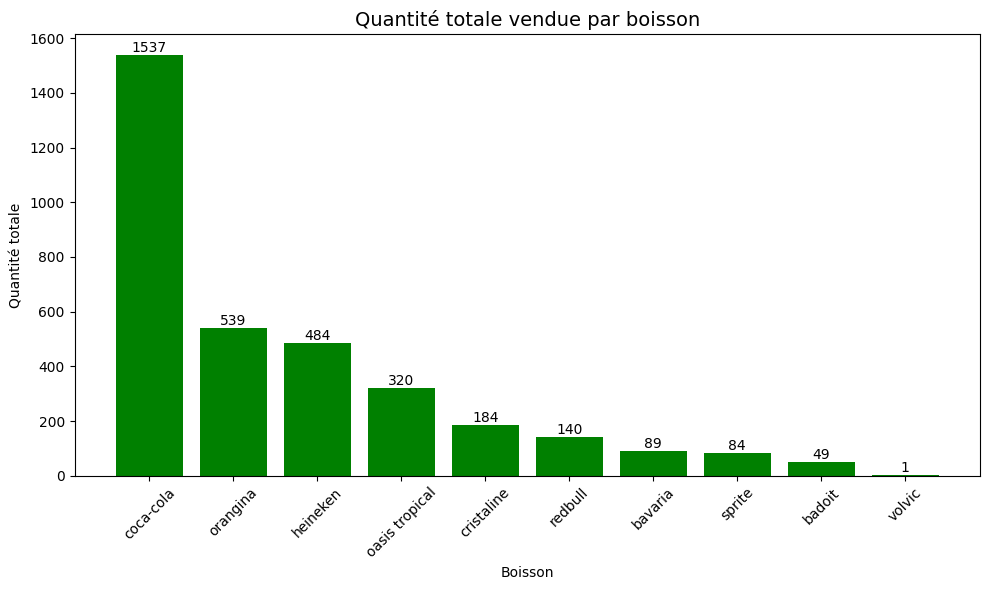

In [36]:
# Grouper par itemName et faire la somme des quantités
quantites = data_complete.groupby('itemName')['quantity'].sum().sort_values(ascending=False)

# Création du diagramme en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(quantites.index, quantites.values, color='green')

# Ajouter les quantités au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval),
             ha='center', va='bottom', fontsize=10)

# Ajouter des titres et labels
plt.title('Quantité totale vendue par boisson', fontsize=14)
plt.xlabel('Boisson')
plt.ylabel('Quantité totale')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

#### <font color="red"> PREMIERE INFORMATION<font color="black">: selon nos données les boissons les plus consommées en France sont:<font color="red"> le coca-cola, l'orangina et l'heineken<font color="red">.

##### <font color="green"> LES VILLES QUI CONSOMMENT PLUS DE BOISSONS

In [38]:
# Vérification des valeurs manquantes sur chaque colonne
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 0 to 2666
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   receiptId   2640 non-null   object        
 1   date        267 non-null    datetime64[ns]
 2   itemName    2640 non-null   object        
 3   quantity    2640 non-null   int64         
 4   unit_price  2640 non-null   float64       
 5   postalCode  2640 non-null   object        
 6   storeId     2640 non-null   object        
 7   city        2547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 185.6+ KB


#### On remarque qu'une colonne essentielle à cette analyse qui est <font color="red">'city'<font color="black"> comporte des <font color="red">valeurs manquantes<font color="black">. Cette colonne nous donne la possibilité d'<font color="red">avoir les villes dans notre analyse<font color="black">.

In [41]:
# Voir le nombre de valeurs manquantes
data_complete['city'].isna().sum()

np.int64(93)

#### Puisque notre colonne <font color="red">'city'<font color="black"> comporte <font color="red">93 valeurs manquantes<font color="black"> on fixera notre analyse sur <font color="red">les valeurs présentes<font color="black"> dans la colonne.

In [48]:
# Mise à jour de data_complete juste avec les valeurs présentes de la colonne 'city'
data_complete=data_complete[data_complete['city'].notna()]

# Afficher les 5 premières lignes 
data_complete.head()

,receiptId,date,itemName,quantity,unit_price,postalCode,storeId,city
0,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,ANCHE
1,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,CANDES ST MARTIN
2,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,CHINON
3,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,CINAIS
4,486aa07e-4391-4912-8d08-f38edbfdd0e2,NaT,orangina,1,3.9,37500,2e4fb6fa-bcd5-41f1-b1d9-fada8b680f45,COUZIERS


In [51]:
# Vérifions à nouveau le nombres des valeurs manquantes de la colonne 'city'
data_complete['city'].isna().sum()

np.int64(0)

#### Nous n'avons <font color="red">plus de valeurs manquantes<font color="black"> à colonne <font color="red">'city'<font color="red">.

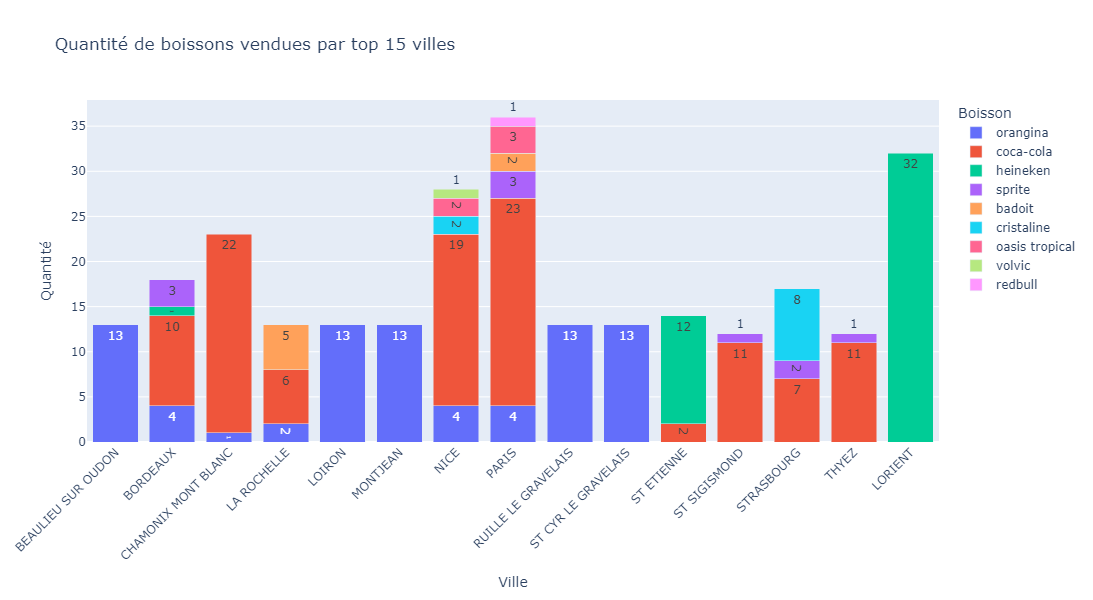

In [52]:
# Calculer la quantité totale vendue par ville
total_par_ville = data_complete.groupby('city')['quantity'].sum()

# Sélectionner les 15 villes avec le plus de ventes
top_15_villes = total_par_ville.sort_values(ascending=False).head(15).index

# Filtrer les données pour ne garder que ces villes
filtered = data_complete[data_complete['city'].isin(top_15_villes)]

# Regrouper par ville et boisson
grouped = filtered.groupby(['city', 'itemName'])['quantity'].sum().reset_index()

# Créer un graphique en barres empilées interactif 
fig = px.bar(
    grouped,
    x='city',
    y='quantity',
    color='itemName',
    title='Quantité de boissons vendues par top 15 villes',
    labels={'quantity': 'Quantité', 'city': 'Ville', 'itemName': 'Boisson'},
    height=600,
    text='quantity' 
)

fig.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    legend_title_text='Boisson',
    hovermode='x unified' 
)

fig.show()

#### <font color="red"> DEUXIEME INFORMATION<font color="black">: selon nos données les villes qui consomment le plus de boissons en France sont:<font color="red"> PARIS, LORIENT, NICE, CHAMONIX MONT BLANC ET BORDEAUX.

## CONCLUSION

Nous avons pu remarquer dans la rédaction de ce sujet qu'il nous fallait d'abord mieux s'informer sur nos différents tables. Nos différentes tables nous ont permis de centraliser le sujet, notamment en réunissant les informations selon les besoins.

Connaissant maintenant le besoin, nous avons nommé une TABLE PIVOT celle qui nous a permis de relier correctement les informations aux différentes tables et de bénéficier sur une table principale par le moyen des jointures, des informations essentielles à notre analyse. Pour aller mieux à la cible de notre analyse il nous a fallu transformer, nettoyer nos données et encore trier des variables qui vont dans le sens de notre analyse.

S'informer sur les enjeux de l'analyse, nous a permis de comprendre dans quelles directions nous allions, et prendre les meilleurs décisions. Ayant par exemple énormément d'informations au niveau des boissons, aller chercher les informations nous aide à gagner en temps et d'être rassurer sur la véracité de nos analyses par comparaison de ce que nous trouvons. 

Les visualisations graphiques nous ont permis de nous fixer sur des insights qui, feront peut-être l'objet des décisions adapter aux potentiels concernés par cette analyse. Ces insights nous ont éclairés et nous donnent dès à présent, les perpectives d'exploration d'autres informations, sur la base de nos données.